### meeting assumptions of linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
import seaborn as sns
from IPython.display import display, HTML


import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

from useful.eda import basic_info

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
temperature_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

### Print out the basic info for 

basic info for this dataframe...


,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Index(['summary', 'preciptype', 'dailysummary'], dtype='object')
The number of non-numerical columns is 3
Index(['temperature', 'apparenttemperature', 'humidity', 'windspeed',
       'windbearing', 'visibility', 'loudcover', 'pressure'],
      dtype='object')
The number of numerical columns is 8
missing data/column names....
                     0
dailysummary         0
pressure             0
loudcover            0
visibility           0
windbearing          0
windspeed            0
humidity             0
apparenttemperature  0
temperature          0
preciptype           0
summary              0
date                 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
summary                96453 non-null object
preciptype             96453 non-null object
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96

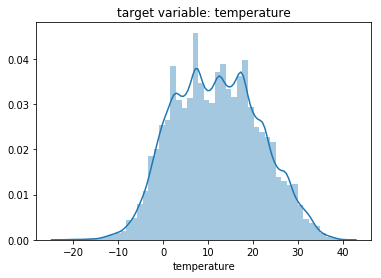

In [3]:
basic_info.data_info(temperature_df, 'temperature')

### Numeric feature correlation

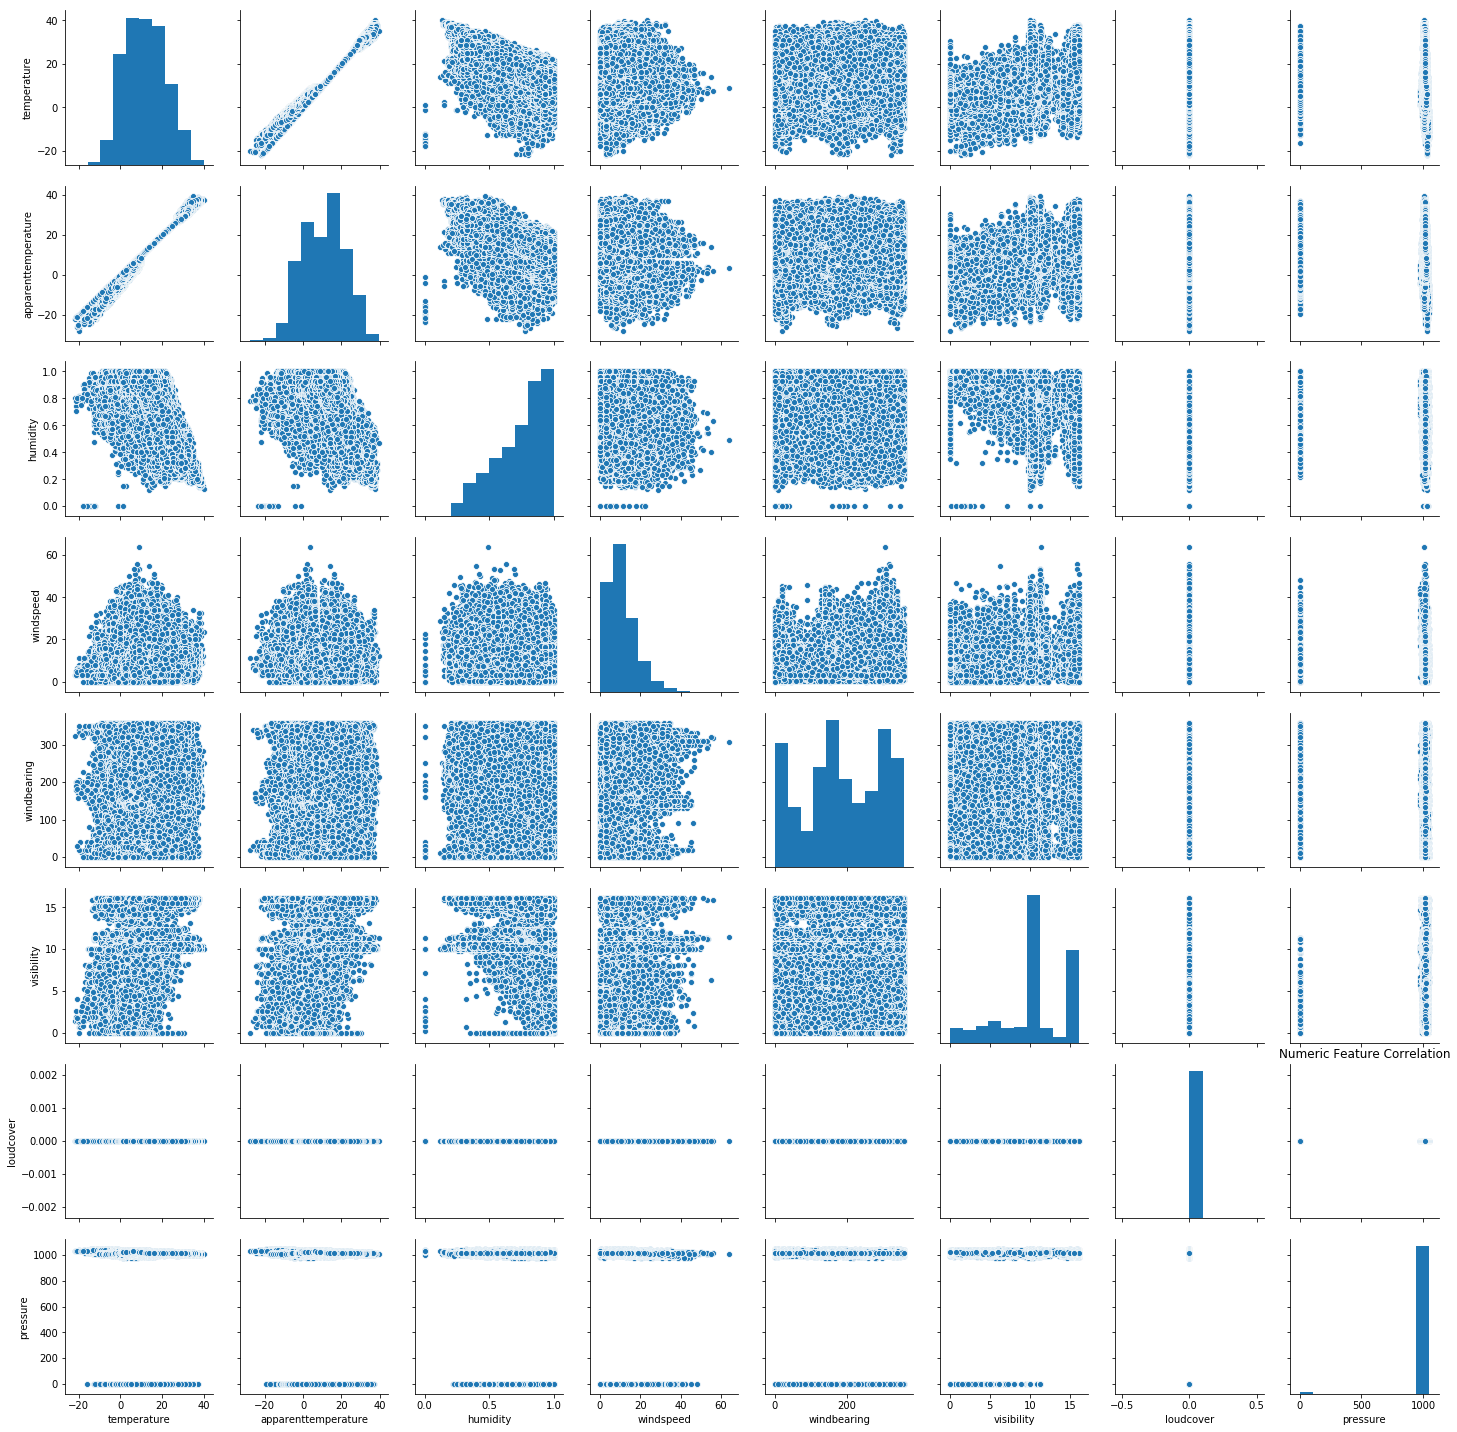

In [5]:
basic_info.numeric_feature_corr(temperature_df)

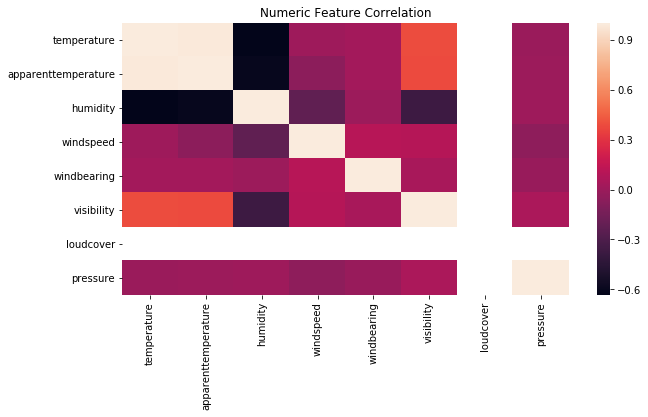

In [4]:
basic_info.numeric_feature_corr(temperature_df,plot='heatmap',figsize=(10,5))

#### Non-numeric Features

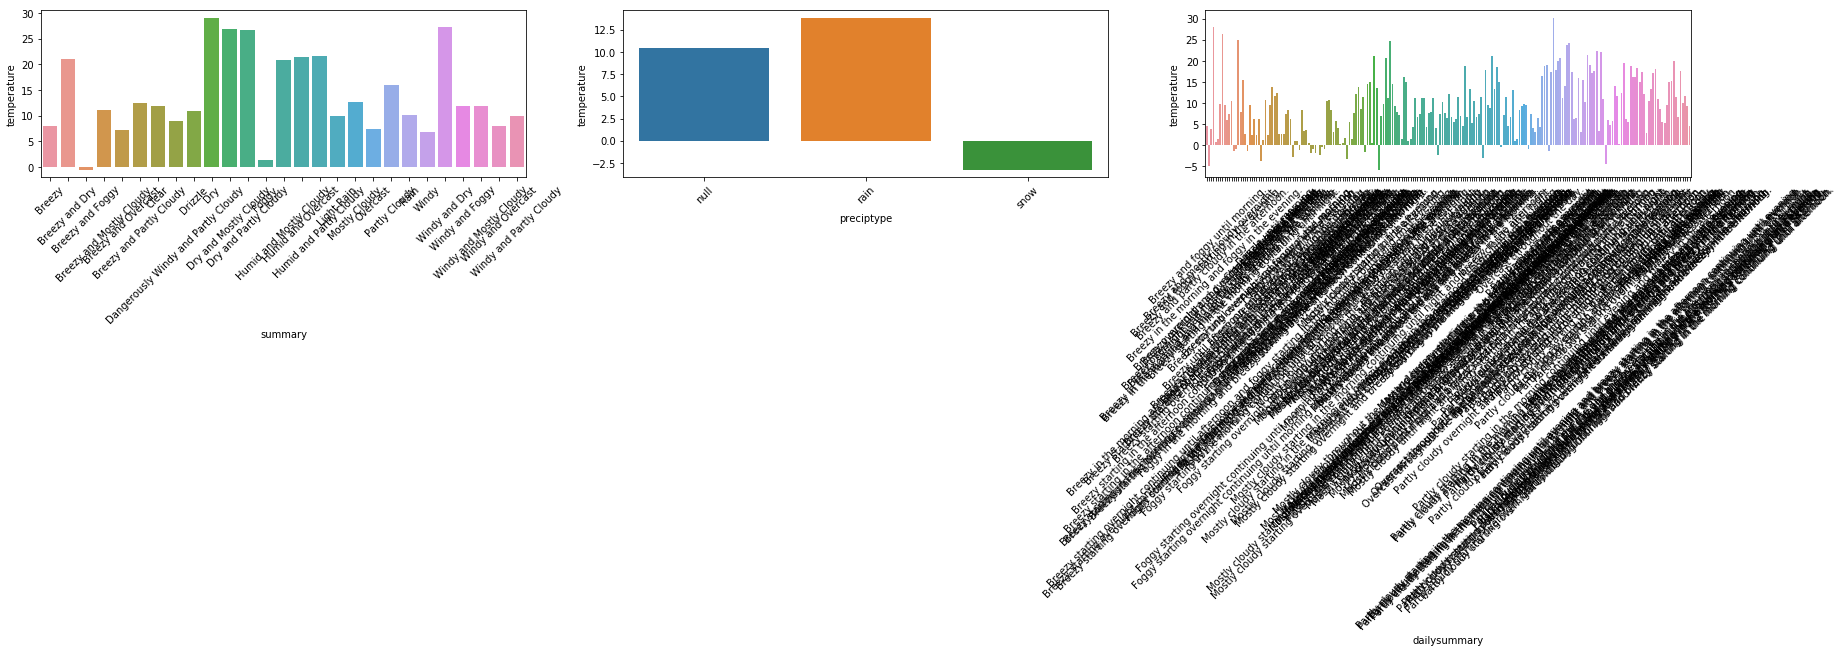

In [5]:
basic_info.non_numeric_feature_corr(temperature_df,'temperature')

#### Regession Model - humidity, windspeed, windbearing

In [87]:
feature_list = ['humidity','windspeed','windbearing']

X = temperature_df.loc[:,[feature for feature in feature_list]].values.tolist()
Y = temperature_df.temperature

In [88]:
from sklearn import linear_model

temp_model = linear_model.LinearRegression()
temp_model.fit(X,Y)

# we print the estimated coefficients
print('\nCoefficients: \n', temp.coef_)
print('\nIntercept: \n', temp_model.intercept_)



Coefficients: 
 [ 0.00000000e+00 -3.24938597e+01 -2.00829865e-01  4.05324251e-03]

Intercept: 
 37.22346138000535


#### Assumption 1 


In [105]:
# predictions of the linear regression
result = temp_model.predict(X)



96453

In [101]:
df = pd.DataFrame({'Actual': Y, 'Predicted': result})
df.head()

,Actual,Predicted
0,9.472222,6.485633
1,9.355556,7.463774
2,9.377778,8.341848
3,8.288889,8.511456
4,8.755556,9.085262


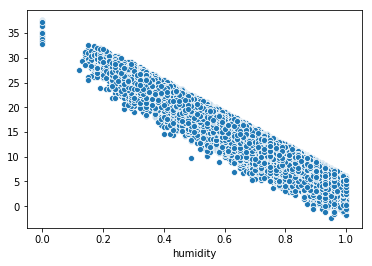

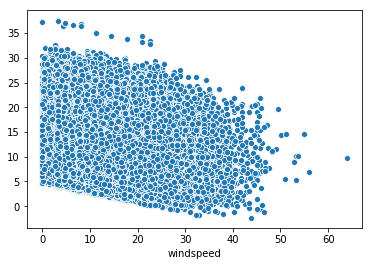

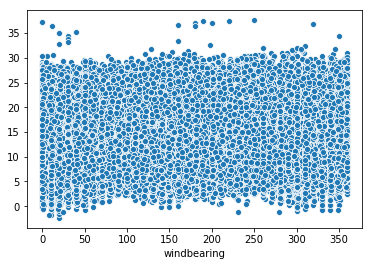

In [119]:
for feature in feature_list:
    sns.scatterplot(temperature_df[feature],predictions)
    plt.show()

### Assumption 2 the Error Term Should be 0

In [108]:
predictions = temp_model.predict(X)
errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: 1.6180000592066363e-12


### Assumption three: homoscedasticity


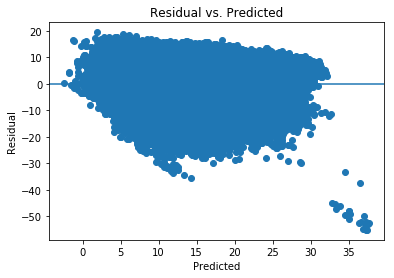

In [120]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

#### Barlett and Levene Tests

In [122]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2469.35 and p value is 0
Levene test statistic value is 2330.89 and p value is 0


the p value = 0 which means we reject the null hypothesis that the errors of homoscedastic

### Assumption five: error terms should be uncorrelated with one another

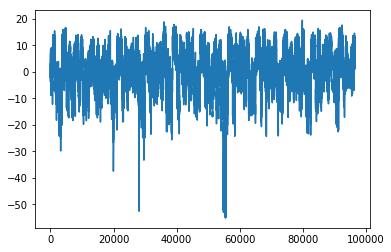

In [117]:
plt.plot(errors)
plt.show()

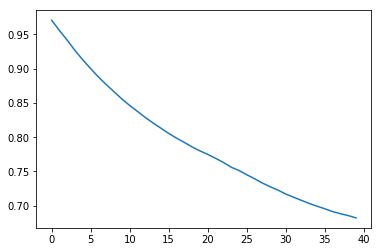

In [118]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

Errors for this data set are between 1 and .7. 

### Assumption six: features shouldn't be correlated with the errors

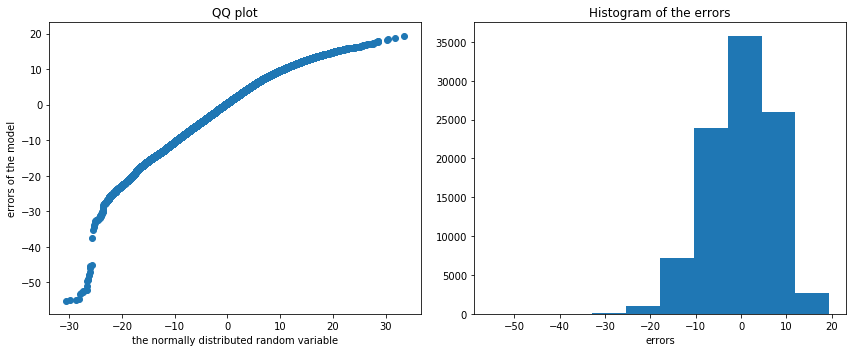

In [123]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [124]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3785.3065870507007 and p value is 0.0
Normality test statistics is 3369.868202137007 and p value is 0.0


The results of the Jarque-Bera test and the normality test indicate that the data is not normally distributed.